In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import h5py

In [3]:
src = "../../../../../../media/mods-pred/Datasets/Data_uconn_h5/50/1.h5"

In [4]:
with h5py.File(src, "r") as f:
    keys = list(f.keys())
    print(keys)
    raw = f[keys[0]][:]  

# Convert to text
text = raw.tobytes().decode("utf-8")

# Load as json
data_json = json.loads(text)

df = pd.DataFrame(data_json)
print(df.keys())

['rpt_cell_50_part1']
Index(['', 'Week Number', 'RPT Number', 'Date (yyyy.mm.dd hh.mm.ss)',
       'Step Number', 'State', 'Time (s)', 'Voltage (V)', 'Current (A)',
       'Capacity (Ah)', 'Segment Key', 'Pulse Type', 'Pulse SOC', 'Life',
       'Num Cycles'],
      dtype='object')


In [5]:
dfTime = df["Time (s)"].astype(float)
dfU = df["Voltage (V)"].astype(float)
dfI = df["Current (A)"].astype(float)
dfCapacity = df["Capacity (Ah)"].astype(float)

In [6]:
# Check idx where df["Time"] == 0
idx = np.where(np.array(dfTime) == 0)[0]
idx = np.insert(idx, 0, 0)
print(idx)

[     0  44219  91691 155414 221641 272995 348351 398521 473492 538876
 612166 669896 714149 787337 841077 916671 962587]


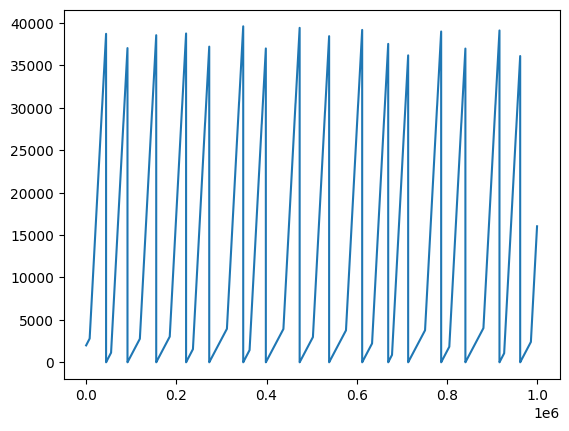

In [7]:
plt.plot(dfTime)
plt.show()

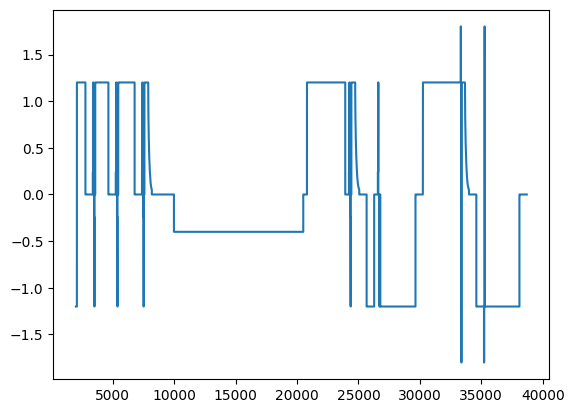

In [8]:
# plot current vs time
plt.plot(dfTime[0:44219], dfI[0:44219])
plt.show()

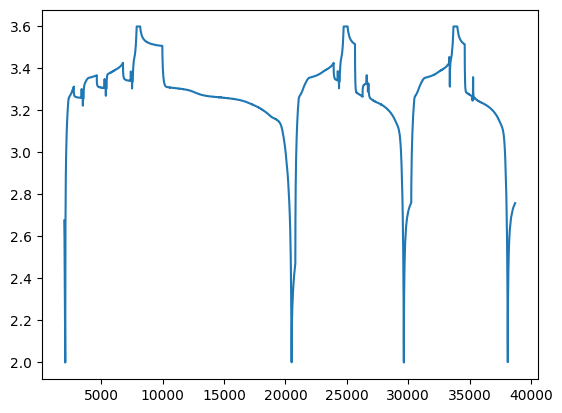

In [9]:
plt.plot(dfTime[0:44219], dfU[0:44219])
plt.show()

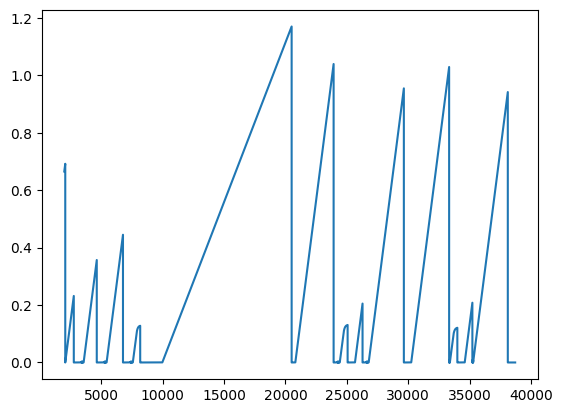

Q_discharge: 1.17030417777778 Ah
SOH: 97.52534814814835%


In [10]:
plt.plot(dfTime[0:44219], dfCapacity[0:44219])
plt.show()
Q_discharge = abs(max(dfCapacity[0:44219])) - abs(min(dfCapacity[0:44219]))
print(f"Q_discharge: {Q_discharge} Ah")
print(f"SOH: {Q_discharge * 100 / 1.2}%")  # 1.2 Ah is the nominal capacity of the battery

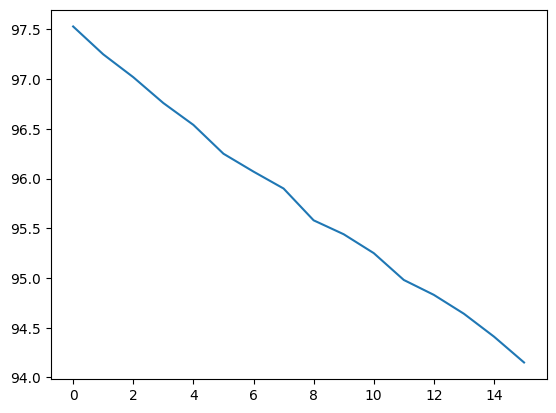

In [11]:
SOH_list = []
for i in range(len(idx)):
    if i == len(idx) - 1:
        break
    Q_discharge = abs(max(dfCapacity[idx[i] : idx[i + 1]])) - abs(
        min(dfCapacity[idx[i] : idx[i + 1]])
    )
    SOH = Q_discharge * 100 / 1.2  # 1.2 Ah is the nominal capacity of the battery
    SOH = round(SOH, 2)
    SOH_list.append(SOH)

plt.plot(SOH_list)
plt.show()